In [24]:
LIBRARY='mordred'

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [26]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(16,9)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [27]:
def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

# Optimized Models Vs. Error (Stacked Histogram wrt Feature Type)

In [40]:
# MODEL_OPT_DF_2d+3d+fp_rdkit.pkl
file_name=f'MODEL_PERFORMANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'MODEL_PERFORMANCE_DF_2d+3d_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'MODEL_PERFORMANCE_DF_2d_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'MODEL_PERFORMANCE_DF_3d_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set_x,model_name,opt_model,opt_params,feat_set_y,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,feat_set,test_r2,test_mse,test_mae
0,2d+3d+fp_mordred,linear_reg,LinearRegression(positive=True),"{'fit_intercept': True, 'normalize': False, 'p...",2d+3d+fp_mordred,0.930290,0.030873,0.102717,2d+3d+fp_mordred,0.909180,0.038496,0.120980
1,2d+3d+fp_mordred,ridge,"Ridge(alpha=0.5, max_iter=500)","{'alpha': 0.5, 'max_iter': 500, 'solver': 'aut...",2d+3d+fp_mordred,0.955881,0.019783,0.083853,2d+3d+fp_mordred,0.885091,0.048706,0.122869
2,2d+3d+fp_mordred,lasso,"Lasso(alpha=0.01, max_iter=100, positive=True)","{'alpha': 0.01, 'max_iter': 100, 'positive': T...",2d+3d+fp_mordred,0.924848,0.030284,0.124689,2d+3d+fp_mordred,0.861436,0.058733,0.148138
3,2d+3d+fp_mordred,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",2d+3d+fp_mordred,0.795277,0.085651,0.241691,2d+3d+fp_mordred,0.773293,0.096094,0.253799
4,2d+3d+fp_mordred,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",2d+3d+fp_mordred,0.820624,0.073389,0.216896,2d+3d+fp_mordred,0.724887,0.116612,0.240223
...,...,...,...,...,...,...,...,...,...,...,...,...
15,3d_mordred,random_forest,"(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 50, 'oob_s...",3d_mordred,0.767778,0.100733,0.151608,3d_mordred,0.856282,0.060918,0.148923
16,3d_mordred,ada_boost,"(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1, 'loss': 'square', 'n_esti...",3d_mordred,0.846284,0.064669,0.153732,3d_mordred,0.670619,0.139614,0.214833
17,3d_mordred,gradient_boosting_reg,([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 2, 'n_estimators': 250, 'tol': 0...",3d_mordred,0.856918,0.067425,0.130135,3d_mordred,0.897479,0.043455,0.126236
18,3d_mordred,neural_network,"MLPRegressor(early_stopping=True, hidden_layer...","{'activation': 'relu', 'early_stopping': True,...",3d_mordred,0.845496,0.065221,0.108706,3d_mordred,0.912319,0.037165,0.103573


(0.0, 1.0)

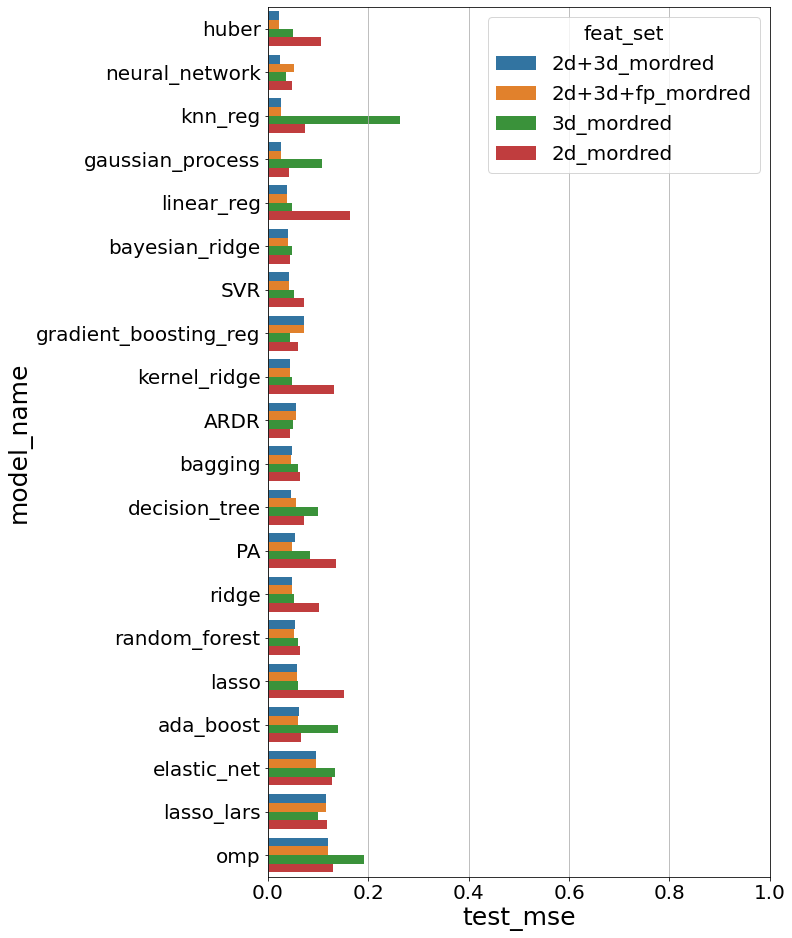

In [41]:
# plt.barh(df['model_name'],df['test_mse'])
df=df.sort_values(by='test_mse')
plt.figure(figsize=(9,16))
sns.barplot(x='test_mse', y='model_name',  data=df, hue='feat_set')
plt.xlim(0,1)

# Best Model Error Vs. Num Features

In [30]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
file_name=f'BEST_MODEL_VS_NUM_FETURES_2d+3d+fp_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,test_r2,test_mse,test_mae
num_feat,,,,,
1,2d_mordred,huber,0.526797,0.200576,0.360341
2,2d_mordred,huber,0.518669,0.204021,0.365062
3,2d_mordred,huber,0.521166,0.202962,0.364238
4,2d_mordred,huber,0.563148,0.185167,0.276802
5,2d_mordred,huber,0.669547,0.140068,0.250329
6,2d_mordred,huber,0.669546,0.140069,0.250329
7,2d_mordred,huber,0.669718,0.139996,0.250293
8,2d_mordred,huber,0.716687,0.120087,0.245015
9,2d_mordred,huber,0.739540,0.110400,0.240441


(0.0, 100.0)

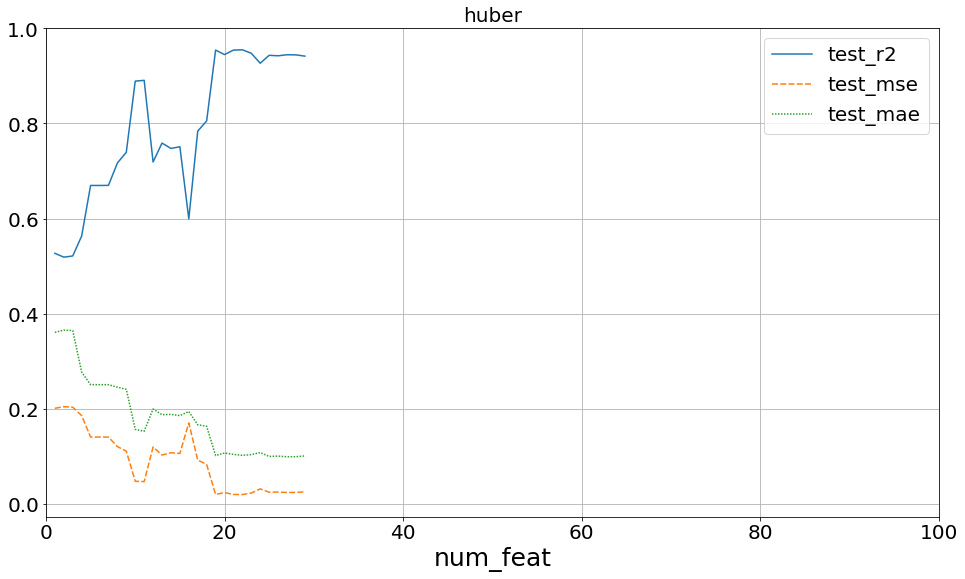

In [31]:
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
plt.xlim(0,100)

# left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
# ax2 = fig.add_axes([left, bottom, width, height])

# Feature Importance Plots

In [32]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
file_name=f'FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score,mean_permutation_imp_score
0,ABC_2d_mordred,0.004468,0.008005,0.000331,1.286622,0.637430
1,ABCGG_2d_mordred,0.003870,0.006296,0.003197,1.237426,0.064180
2,nAcid_2d_mordred,0.000047,0.000968,0.000235,0.000000,0.000318
3,SpAbs_A_2d_mordred,0.020131,0.011156,0.032976,1.248787,0.117329
4,SpMax_A_2d_mordred,0.003342,0.004870,0.005609,0.644148,0.002633
5,SpDiam_A_2d_mordred,0.003993,0.010744,0.003580,0.649504,0.002084
6,SpAD_A_2d_mordred,0.027117,0.016402,0.018684,1.253025,0.114528
7,SpMAD_A_2d_mordred,0.001312,0.000155,0.000039,1.004077,0.005344
8,LogEE_A_2d_mordred,0.004550,0.002412,0.000035,1.132090,6.505143
9,VE1_A_2d_mordred,0.003808,0.013825,0.000350,1.211943,0.106583


<AxesSubplot:xlabel='random_forest_score', ylabel='feat_name'>

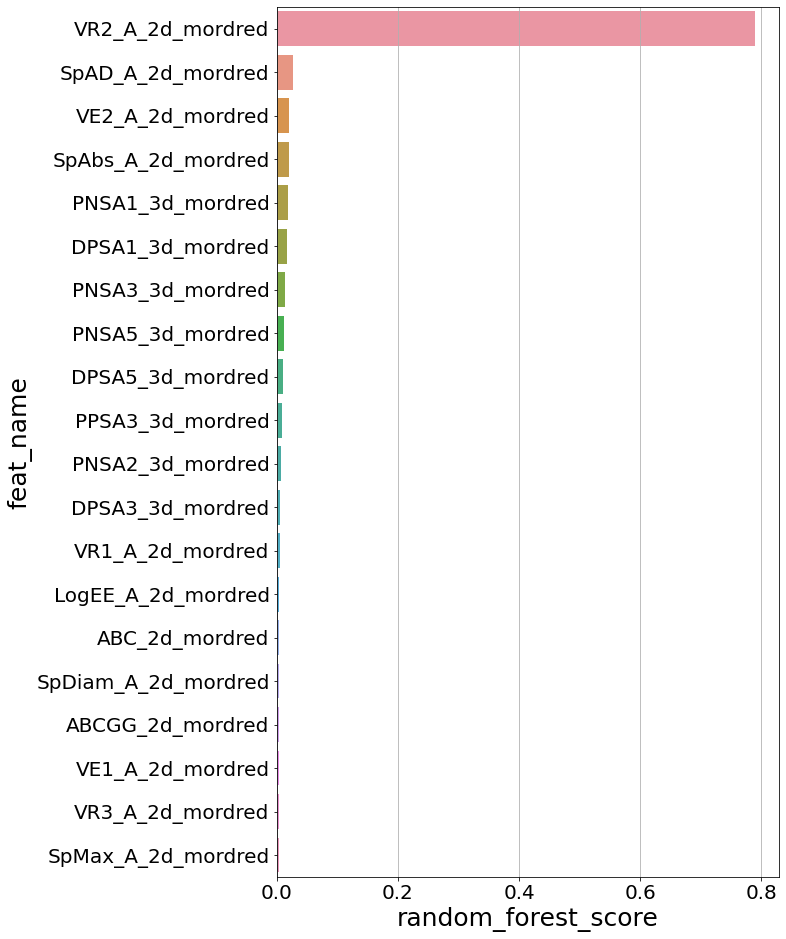

In [33]:
ntop=20
df=df.sort_values(by='random_forest_score',ascending=False)
plt.figure(figsize=(9,16))
sns.barplot(x='random_forest_score',y='feat_name',data=df[:ntop])

# Model Performance on Top n=20 Features

In [42]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set_x,model_name,opt_model,opt_params,feat_set_y,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,feat_set,test_r2,test_mse,test_mae
0,top_20_feat_mordred,linear_reg,LinearRegression(positive=True),"{'fit_intercept': True, 'normalize': False, 'p...",top_20_feat_mordred,0.930290,0.030873,0.102717,3d_mordred,0.909180,0.038496,0.120980
1,top_20_feat_mordred,ridge,"Ridge(alpha=0.5, max_iter=500, solver='lsqr', ...","{'alpha': 0.5, 'max_iter': 500, 'solver': 'lsq...",top_20_feat_mordred,0.955978,0.019774,0.083541,3d_mordred,0.885300,0.048618,0.122717
2,top_20_feat_mordred,lasso,"Lasso(alpha=0.01, max_iter=100, positive=True)","{'alpha': 0.01, 'max_iter': 100, 'positive': T...",top_20_feat_mordred,0.924848,0.030284,0.124689,3d_mordred,0.861436,0.058733,0.148138
3,top_20_feat_mordred,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",top_20_feat_mordred,0.795277,0.085651,0.241691,3d_mordred,0.773293,0.096094,0.253799
4,top_20_feat_mordred,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",top_20_feat_mordred,0.820624,0.073389,0.216896,3d_mordred,0.724887,0.116612,0.240223
...,...,...,...,...,...,...,...,...,...,...,...,...
15,3d_mordred,random_forest,"(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 50, 'oob_s...",3d_mordred,0.767778,0.100733,0.151608,3d_mordred,0.856282,0.060918,0.148923
16,3d_mordred,ada_boost,"(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1, 'loss': 'square', 'n_esti...",3d_mordred,0.846284,0.064669,0.153732,3d_mordred,0.670619,0.139614,0.214833
17,3d_mordred,gradient_boosting_reg,([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 2, 'n_estimators': 250, 'tol': 0...",3d_mordred,0.856918,0.067425,0.130135,3d_mordred,0.897479,0.043455,0.126236
18,3d_mordred,neural_network,"MLPRegressor(early_stopping=True, hidden_layer...","{'activation': 'relu', 'early_stopping': True,...",3d_mordred,0.845496,0.065221,0.108706,3d_mordred,0.912319,0.037165,0.103573


<AxesSubplot:xlabel='test_mse', ylabel='model_name'>

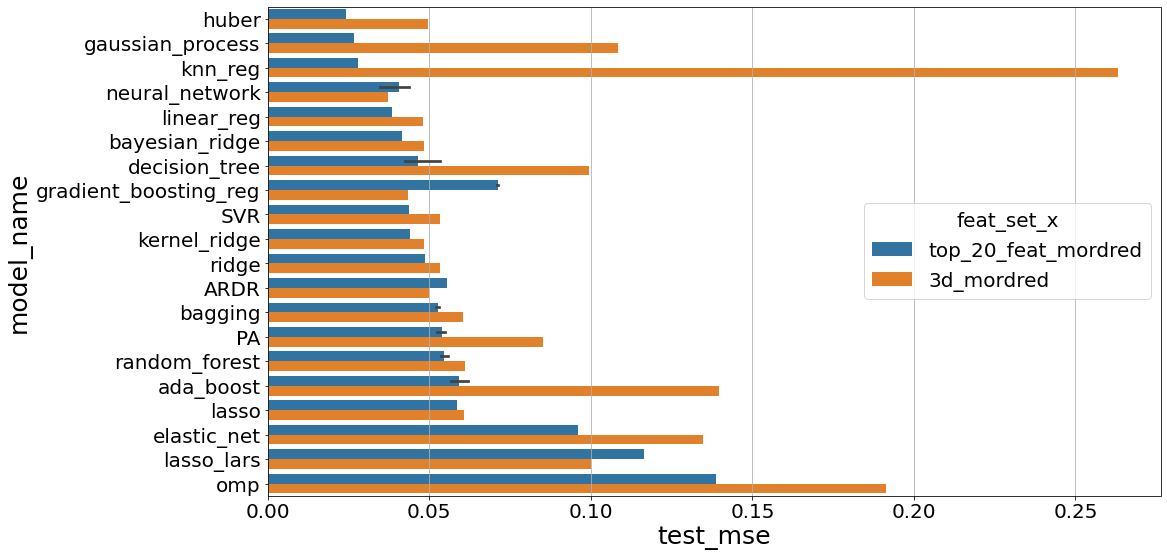

In [44]:
df=df.sort_values(by='test_mse')
sns.barplot(x='test_mse',y='model_name',data=df,hue='feat_set_x')

# Model Error per Class of Compound

In [36]:
# BEST_MODEL_ERROR_PER_COMPOUND_TRAIN_rdkit.pkl
file_name=f'BEST_MODEL_MEAN_ERROR_PER_COMPOUND_TRAIN_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
df1['label']='train'
file_name=f'BEST_MODEL_MEAN_ERROR_PER_COMPOUND_TEST_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
df2['label']='test'
df=pd.concat([df1,df2])
df

File Found
File Found


,true_y,pred_y,abs_error,%abs_error,model_name,feat_set,label
FG_name,,,,,,,
F,-1.680000,-1.678589,0.001411,0.083977,huber,2d+3d+fp_mordred,train
2CH3N,-1.915000,-1.911934,0.003066,0.162372,huber,2d+3d+fp_mordred,train
CH3,-1.790000,-1.795954,0.010397,0.580845,huber,2d+3d+fp_mordred,train
CONH2,-1.575000,-1.553578,0.021422,1.401987,huber,2d+3d+fp_mordred,train
COCH3,-1.550000,-1.521529,0.028471,1.836841,huber,2d+3d+fp_mordred,train
NH2,-2.136970,-2.136154,0.036956,1.732311,huber,2d+3d+fp_mordred,train
OH,-1.806000,-1.807439,0.039257,2.174953,huber,2d+3d+fp_mordred,train
NO2,-0.679474,-0.682274,0.040843,5.627520,huber,2d+3d+fp_mordred,train
COOH,-1.415000,-1.415001,0.041047,2.920126,huber,2d+3d+fp_mordred,train


<AxesSubplot:xlabel='%abs_error', ylabel='FG_name'>

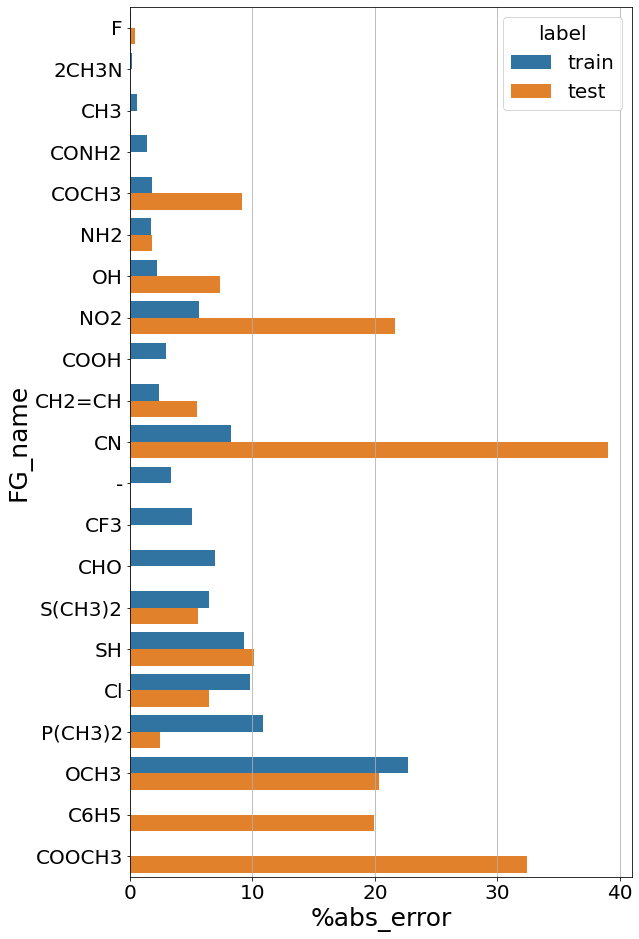

In [37]:
df=df.reset_index()
plt.figure(figsize=(9,16))
sns.barplot(y='FG_name',x='%abs_error',data=df, hue='label')